## Desafio

Criar Key e coletar dados da cotação de dolar no site do Banco Central, utilizando api pública do governo:

In [61]:
# essa linha importa os recursos
## doc requests -  https://docs.python-requests.org/en/latest/user/quickstart/#make-a-request
## Postman

import pandas as pd
import json, requests

api_bcb = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.4466/dados?formato=json&dataInicial=01/01/2000&dataFinal=31/12/2016'

In [62]:
result = requests.get(api_bcb)
print(result)

<Response [200]>


In [63]:
result.text

'[{"data":"01/01/2000","valor":"0.48"},{"data":"01/02/2000","valor":"0.44"},{"data":"01/03/2000","valor":"0.37"},{"data":"01/04/2000","valor":"0.45"},{"data":"01/05/2000","valor":"0.35"},{"data":"01/06/2000","valor":"0.42"},{"data":"01/07/2000","valor":"0.58"},{"data":"01/08/2000","valor":"0.58"},{"data":"01/09/2000","valor":"0.40"},{"data":"01/10/2000","valor":"0.40"},{"data":"01/11/2000","valor":"0.30"},{"data":"01/12/2000","valor":"0.36"},{"data":"01/01/2001","valor":"0.41"},{"data":"01/02/2001","valor":"0.52"},{"data":"01/03/2001","valor":"0.57"},{"data":"01/04/2001","valor":"0.46"},{"data":"01/05/2001","valor":"0.60"},{"data":"01/06/2001","valor":"0.73"},{"data":"01/07/2001","valor":"0.65"},{"data":"01/08/2001","valor":"0.56"},{"data":"01/09/2001","valor":"0.57"},{"data":"01/10/2001","valor":"0.57"},{"data":"01/11/2001","valor":"0.77"},{"data":"01/12/2001","valor":"0.78"},{"data":"01/01/2002","valor":"0.52"},{"data":"01/02/2002","valor":"0.54"},{"data":"01/03/2002","valor":"0.58"}

In [64]:
# realiza a conversão do response para um formato acessível ao python
json_data = json.loads(result.text)

In [65]:
json_data

[{'data': '01/01/2000', 'valor': '0.48'},
 {'data': '01/02/2000', 'valor': '0.44'},
 {'data': '01/03/2000', 'valor': '0.37'},
 {'data': '01/04/2000', 'valor': '0.45'},
 {'data': '01/05/2000', 'valor': '0.35'},
 {'data': '01/06/2000', 'valor': '0.42'},
 {'data': '01/07/2000', 'valor': '0.58'},
 {'data': '01/08/2000', 'valor': '0.58'},
 {'data': '01/09/2000', 'valor': '0.40'},
 {'data': '01/10/2000', 'valor': '0.40'},
 {'data': '01/11/2000', 'valor': '0.30'},
 {'data': '01/12/2000', 'valor': '0.36'},
 {'data': '01/01/2001', 'valor': '0.41'},
 {'data': '01/02/2001', 'valor': '0.52'},
 {'data': '01/03/2001', 'valor': '0.57'},
 {'data': '01/04/2001', 'valor': '0.46'},
 {'data': '01/05/2001', 'valor': '0.60'},
 {'data': '01/06/2001', 'valor': '0.73'},
 {'data': '01/07/2001', 'valor': '0.65'},
 {'data': '01/08/2001', 'valor': '0.56'},
 {'data': '01/09/2001', 'valor': '0.57'},
 {'data': '01/10/2001', 'valor': '0.57'},
 {'data': '01/11/2001', 'valor': '0.77'},
 {'data': '01/12/2001', 'valor': '

In [66]:
# imprime na tela o valor do primeiro ano do censo - demonstração de navegação
print(json_data[0])

{'data': '01/01/2000', 'valor': '0.48'}


In [67]:
df = pd.DataFrame(json_data)

In [68]:
#df['data'] = pd.to_datetime(df.data)
df['valor'] = df.valor.astype(float)

In [69]:
df.head()

,data,valor
0,01/01/2000,0.48
1,01/02/2000,0.44
2,01/03/2000,0.37
3,01/04/2000,0.45
4,01/05/2000,0.35


In [71]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    204 non-null    object 
 1   valor   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


(204, 2)

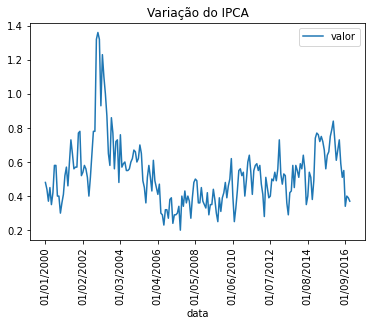

In [72]:
df.plot.line(y = 'valor', x = 'data', rot=90, title = 'Variação do IPCA');
